<ipython-input-1-cdb04e227af4>:101: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_range = pd.date_range(start="2020-01-01", end="2023-12-31", freq='M')


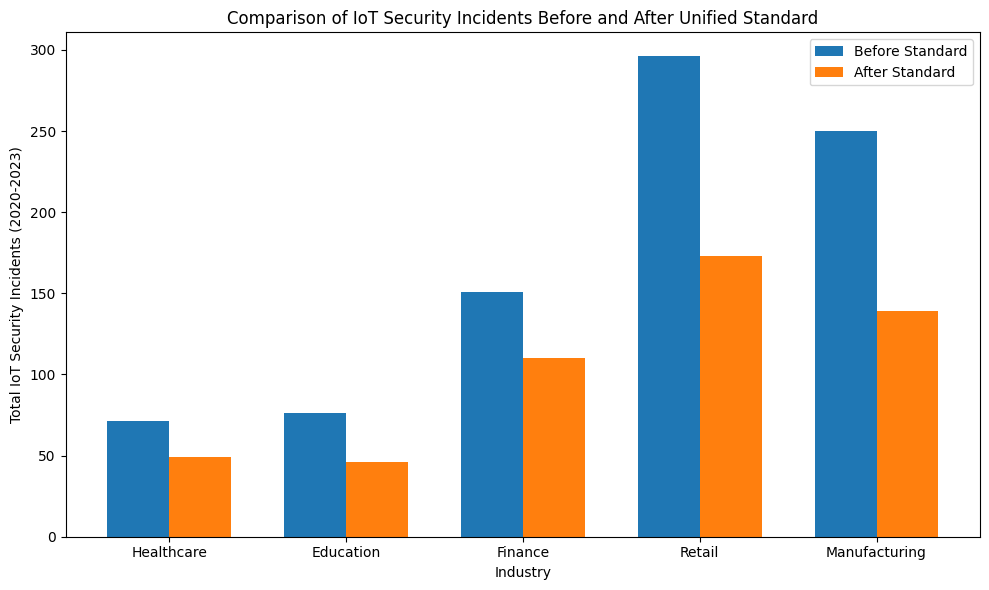

IoT Security Incidents Comparison (Before and After Unified Standard):
        Industry  Incidents_Before  Incidents_After
0      Education                71               49
1        Finance                76               46
2     Healthcare               151              110
3  Manufacturing               296              173
4         Retail               250              139


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If the file is in your Google Drive (optional usage):
file_path = '/content/drive/MyDrive/Praxis Code File/IoT Security Incidents.ipynb'

# Create a sample unified_security_standard.json (replace with your actual data)
unified_standard = {
    "industry_standards": {
        "Finance": {
            "max_incidents_per_month": 1,
            "required_protocols": [
                "Encryption",
                "Multi-Factor Authentication",
                "Regular Audits",
                "Advanced Threat Detection",
                "Zero Trust Architecture",
                "IoT Device Authentication",
                "Intrusion Detection and Prevention Systems (IDPS)",
                "Microsegmentation",
                "Real-time Security Monitoring and Analytics",
                "Incident Response Automation"
            ]
        },
        "Healthcare": {
            "max_incidents_per_month": 2,
            "required_protocols": [
                "Data Anonymization",
                "Access Control",
                "Regular Audits", "Employee Training",
                "Supply Chain Monitoring",
                "Advanced Threat Detection",
                "IoT Device Authentication",
                "Intrusion Detection and Prevention Systems (IDPS)",
                "IoT Device Lifecycle Management",
                "Real-time Security Monitoring and Analytics",
                "Network Access Control",
                "Incident Response Automation"
            ]
        },
        "Retail": {
            "max_incidents_per_month": 3,
            "required_protocols": [
                "Encryption",
                "Access Control",
                "Employee Training",
                "Supply Chain Monitoring",
                "Real-time Security Monitoring",
                "Advanced Threat Detection",
                "IoT Device Authentication",
                "Incident Response Automation",
                "Intrusion Detection and Prevention Systems (IDPS)"
            ]
        },
        "Education": {
            "max_incidents_per_month": 1,
            "required_protocols": [
                "Data Anonymization",
                "Employee Training",
                "Regular Audits",
                "Network Access Control",
                "IoT Device Lifecycle Management",
                "Microsegmentation",
                "Behavioral Analytics",
                "Real-time Security Monitoring and Analytics",
                "Incident Response Automation"
            ]
        },
        "Manufacturing": {
            "max_incidents_per_month": 4,
            "required_protocols": [
                "Encryption",
                "Access Control",
                "Network Segmentation",
                "IoT Device Hardening",
                "Incident Response Automation",
                "IoT Device Authentication",
                "Supply Chain Monitoring",
                "Blockchain for IoT Security",
                "Advanced Threat Detection"
            ]
        }
    }
}



# Save the JSON data to a file
with open('unified_security_standard.json', 'w') as file:
    json.dump(unified_standard, file)


# Load the unified security standard from JSON file
with open('unified_security_standard.json', 'r') as file:
    unified_standard = json.load(file)

# Define industries and time range
industries = ["Healthcare", "Education", "Finance", "Retail", "Manufacturing"]
time_range = pd.date_range(start="2020-01-01", end="2023-12-31", freq='M')

# Function to simulate IoT security incidents before the unified standard
# We assume the number of incidents before the unified standard would be 1.5x the max allowed incidents.
def simulate_iot_security_incidents_before_standard():
    data = []
    for industry in industries:
        for date in time_range:
            # Simulate increased max incidents (e.g., 1.5x the unified standard limit)
            max_incidents_before = unified_standard["industry_standards"][industry]["max_incidents_per_month"] * 1.5
            incidents = np.random.poisson(max_incidents_before)
            data.append({"Date": date, "Industry": industry, "Incidents": incidents})
    return pd.DataFrame(data)

# Simulate incidents after the unified security standard using the previous function
def simulate_iot_security_incidents():
    data = []
    for industry in industries:
        for date in time_range:
            max_incidents = unified_standard["industry_standards"][industry]["max_incidents_per_month"]
            incidents = np.random.poisson(max_incidents)
            data.append({"Date": date, "Industry": industry, "Incidents": incidents})
    return pd.DataFrame(data)

# Simulate incidents before and after the unified standard
iot_incidents_before_df = simulate_iot_security_incidents_before_standard()
iot_incidents_after_df = simulate_iot_security_incidents()

# Summarize total incidents for each industry (2020-2023) for both cases
total_incidents_before = iot_incidents_before_df.groupby("Industry")["Incidents"].sum().reset_index()
total_incidents_before.rename(columns={"Incidents": "Incidents_Before"}, inplace=True)

total_incidents_after = iot_incidents_after_df.groupby("Industry")["Incidents"].sum().reset_index()
total_incidents_after.rename(columns={"Incidents": "Incidents_After"}, inplace=True)

# Merge both summaries into a single DataFrame for comparison
incident_comparison_df = pd.merge(total_incidents_before, total_incidents_after, on="Industry")

# Plot the comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(industries))

# Plot bars for before and after incidents
plt.bar(index, incident_comparison_df["Incidents_Before"], bar_width, label='Before Standard')
plt.bar(index + bar_width, incident_comparison_df["Incidents_After"], bar_width, label='After Standard')

# Set plot details
plt.xlabel("Industry")
plt.ylabel("Total IoT Security Incidents (2020-2023)")
plt.title("Comparison of IoT Security Incidents Before and After Unified Standard")
plt.xticks(index + bar_width / 2, industries)
plt.legend()

plt.tight_layout()
plt.show()

# Display the comparison DataFrame in the console
print("IoT Security Incidents Comparison (Before and After Unified Standard):")
print(incident_comparison_df)





Explanation:
JSON File:

The unified security standard is defined in a JSON file, specifying maximum incidents per month and required protocols for each industry.
Loading JSON in Python:

The JSON file is loaded into a Python dictionary using the json module.
Simulating Incidents:

The simulate_iot_security_incidents function uses the maximum incidents per month from the unified standard to simulate incidents using a Poisson distribution.
Analysis and Visualization:

The simulated data is grouped by industry and year, then plotted to visualize trends in IoT security incidents.
Displaying Data:

The DataFrame with the simulated data is displayed using ace_tools.
This approach allows you to test and validate the effectiveness of a unified security standard by comparing simulated incident data with the specified standards.